### Importing dpendencies

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data collection


In [26]:
df = pd.read_csv('gld_price_data.csv')

#### About dataset

###### Date - date (MM/dd/yyyy format)
###### SPX - stands for The Standard and Poor's 500 index, or simply the S&P 500. It is a stock market index used for tracking the stock performance of 500 of the largest companies listed on stock exchanges in USA
###### GLD - gold price
###### USO - stands for "The United States Oil Fund ® LP (USO)". It is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca
###### SLV - silver price
###### EUR/USD - Euro to US dollar exchange ratio

In [27]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [28]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [30]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Correlation:

#### 1. positive correlation
#### 2. negative correlation 

In [31]:
correlation = df[['SPX','GLD','USO','SLV','EUR/USD']].corr()

<Axes: >

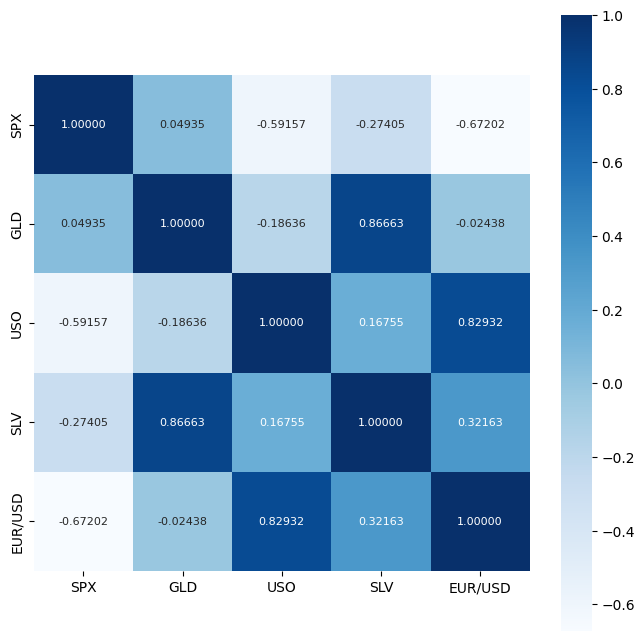

In [32]:
# CONSTRACT THE HEAT MAP
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.5f',annot= True,annot_kws={'size':8},cmap='Blues')

In [33]:
# correlation for GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\shrey\AppData\Local\Temp\ipykernel_11032\679005021.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

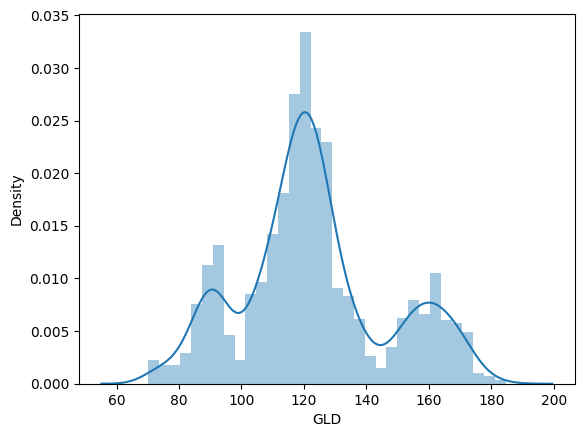

In [34]:
# checking the distribition of theGLD price
sns.distplot(df['GLD'])

### splitting the features and labels

In [35]:
x = df.drop(['Date','GLD'],axis=1)
y = df['GLD']

### splitting in training and test data

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

### Model Training

### Random Forest Regressor

In [37]:
model = RandomForestRegressor()

In [38]:
model.fit(x_train,y_train)

RandomForestRegressor()

### Modele Evaluation

In [45]:
# r score for training data

x_train_pred = model.predict(x_train)
x_train_pred



array([109.99609814, 114.84960078,  90.61009985, ..., 130.41549677,
       159.97839585, 114.78209961])

In [48]:
# R squared error
error_score = metrics.r2_score(x_train_pred,y_train) 
error_score

0.9985513686416977

In [51]:
# r score for testing data
x_test_pred = model.predict(x_test)
x_test_pred

array([168.44889911,  81.68849986, 116.14099998, 127.72510086,
       120.86050163, 154.70189756, 150.27699837, 126.13750066,
       117.28799865, 126.03180066, 116.71060091, 171.75500107,
       141.67629844, 167.46349923, 115.27029991, 117.65330011,
       140.01280289, 170.0979005 , 159.79330299, 159.76480031,
       155.22429987, 125.66960037, 176.45739922, 157.60690354,
       125.1304005 ,  93.76299939,  77.61229974, 120.56280006,
       119.09329941, 167.41319958,  88.41930053, 125.37860114,
        91.3155009 , 117.7052998 , 121.16089963, 136.29900061,
       115.61160072, 115.00400088, 146.69910005, 107.26930096,
       104.34170222,  87.23789786, 126.510301  , 117.76179948,
       153.63949891, 119.67980004, 108.42889993, 108.05109829,
        93.00020011, 127.02919806,  75.26590048, 113.62629958,
       121.20870017, 111.35859925, 118.80479902, 120.79189965,
       158.97329995, 167.22580092, 147.06149672,  85.7785988 ,
        94.22130034,  86.76039863,  90.62269994, 118.91

In [52]:
# r squared error

error_score = metrics.r2_score(x_test_pred,y_test)
error_score

0.9899568432272035

### compare the actual values VS Predicted Values in Plot

In [53]:
y_test = list(y_test)

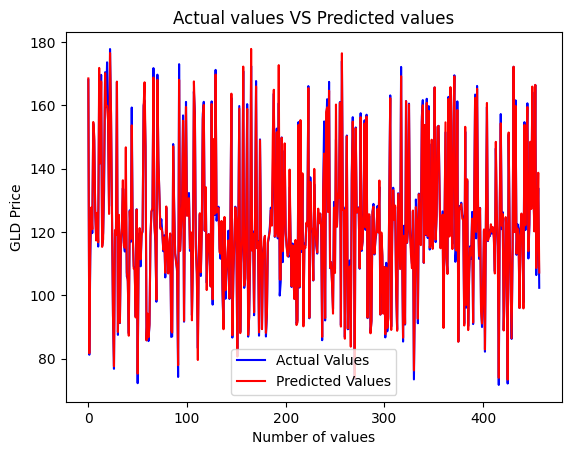

In [58]:
plt.plot(y_test,color = 'blue',label = 'Actual Values')
plt.plot(x_test_pred,color ='red',label = 'Predicted Values')
plt.title('Actual values VS Predicted values')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()